In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix, mean_absolute_error, recall_score, precision_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.dummy import DummyRegressor
from scipy import stats as st
import seaborn as sns


# Overview of the Gold Extraction Process

Mining and Crushing:

    The ore is mined from the ground and crushed into smaller pieces to increase the surface area for the extraction process.
Rougher Process (Flotation):

    The crushed ore (known as rougher feed) undergoes flotation, where chemicals and air are added to separate valuable gold particles from waste material (tailings).
    
    Output:
    
        Rougher Concentrate: Contains a higher concentration of gold and is sent to the next stage of purification.
        
        Rougher Tails: Residual waste material with a lower concentration of valuable metals.
        
Purification (Cleaner Process):

    The rougher concentrate undergoes further purification through multiple stages of cleaner processes.

    Primary Cleaner: The first stage of purification to remove impurities from the rougher concentrate.

    Secondary Cleaner: Further purification to increase the concentration of gold.

    Final Cleaner: The final stage of purification to achieve the highest concentration of gold possible.

Final Product:

    Final Concentrate: The purified product with the highest concentration of gold, ready for smelting or further processing.

    Final Tails: Residual waste material after all purification stages.

Importance of Each Stage

Rougher Process:

    The primary goal is to separate as much gold as possible from the waste material.
    
    Efficiency in this stage determines the quality of the material sent to the purification stages.
    
    Recovery Calculation: Helps in assessing how much gold is being recovered at this initial stage.
    
Cleaner Processes:

    Aim to increase the purity of the gold concentrate from the rougher process.
    
    Each stage progressively removes more impurities, resulting in higher gold concentration.
    
    Recovery Calculation: At each stage, helps in assessing the efficiency of purification and the quality of the final product.

# Objective 

Objective
The main goal of this project is to build a machine learning model that can predict two key values:

Rougher Concentrate Recovery - How much gold is recovered after the first flotation process.
Final Concentrate Recovery - How much gold is recovered after the final purification process.
These predictions will help in optimizing the gold extraction process.

The Gold Extraction Process
Steps in Gold Extraction:
Flotation (Rougher Process)

Input: Raw gold ore.
Output: Rougher gold concentrate (high gold content) and rougher tails (low gold content).
Purification (Cleaner Process)

Input: Rougher gold concentrate.
Output: Final gold concentrate and final tails.
Data Description
You have a dataset containing measurements and calculated values from different stages of the gold extraction process. This dataset has columns like:

rougher.input.feed_au (amount of gold in the raw feed before flotation)
rougher.output.concentrate_au (amount of gold in the rougher concentrate after flotation)
rougher.output.tail_au (amount of gold in the rougher tails after flotation)
Similar columns for the final concentrate and tails.
Key Task: Recovery Calculation
Recovery Calculation Formula
The recovery calculation tells you the efficiency of the gold extraction process. It is calculated using the following formula:

recovery = (C * (F - T) / F * (C - T)) * 100

Where:

C = Concentration of gold after flotation or purification (e.g., rougher.output.concentrate_au)
F = Concentration of gold before flotation or purification (e.g., rougher.input.feed_au)
T = Concentration of gold in the tails after flotation or purification (e.g., rougher.output.tail_au)
Steps to Achieve the Project Goal
Prepare the Data

Handle missing values.
Convert the date column to a datetime format.
Ensure all columns have the correct data types.
Calculate Recovery

Using the formula above, calculate the recovery for the rougher process.
Compare your calculated values with the actual values provided in the dataset (rougher.output.recovery).
Compute the Mean Absolute Error (MAE) to see how close your calculations are to the actual values.
Analyze the Data

Understand how the concentrations of metals (gold, silver, lead) change throughout the process.
Check if the distributions of key parameters are similar between the training and test datasets.
Build a Machine Learning Model

Use the prepared and analyzed data to train a model that predicts the recovery values.
Evaluate the model using cross-validation and select the best-performing one.
Test the selected model on the test dataset to ensure it generalizes well.

# Steps

Project description
The data is stored in three files:

gold_recovery_train.csv — training dataset download
gold_recovery_test.csv — test dataset download
gold_recovery_full.csv — source dataset download
Data is indexed with the date and time of acquisition (date feature). Parameters that are next to each other in terms of time are often similar.

Some parameters are not available because they were measured and/or calculated much later. That's why, some of the features that are present in the training set may be absent from the test set. The test set also doesn't contain targets.

The source dataset contains the training and test sets with all the features.

You have the raw data that was only downloaded from the warehouse. Before building the model, check the correctness of the data. For that, use our instructions.

Project instructions
1. Prepare the data

1.1. Open the files and look into the data.

Path to files:

/datasets/gold_recovery_train.csv
/datasets/gold_recovery_test.csv
/datasets/gold_recovery_full.csv
1.2. Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.

1.3. Analyze the features not available in the test set. What are these parameters? What is their type?

1.4. Perform data preprocessing.

2. Analyze the data

2.1. Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

2.2. Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

2.3. Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies. 

3. Build the model

3.1. Write a function to calculate the final sMAPE value.

3.2. Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

# Data Description 

Data description:

1.	Technological process

    a.	Rougher feed – raw material 
    
    b.	Rougher additions (or reagent additions) – flotation reagents: Xanthate, Sulphate, Depressant 	
    
    i.	Xanthate – promoter or flotation activator;
    
    ii.	Sulphate – sodium sulphide for this this particular process;
        iii.	Depressant – sodium silicate 

    c.	Rougher process – flotation
    
    d.	Rougher tails – product residues
    
    e.	Float banks – flotation unit
    
    f.	Cleaner processes – purification
    
    g.	Rougher Au – rougher gold concentrate 
    
    h.	Final Au – final gold concentrate 
    
2.	Parameters of Stages

    a.	Air amount – volume of air
    b.	Fluid levels
    c.	Feed size – feed particle size
    d.	Feed rate 
    
3.	Feature naming: Here is how you name the features. 

[stage].[parameter_type].[parameter_name]

Example: rougher.input.feed_ag

-	Possible values for [stage]:

    o	Rougher – flotation
    o	Primary_cleaner – secondary purification
    o	Final – final characteristics 
    
Possible values for [parameter_type]:

-	Input – raw material parameters

-	Output – product parameters 

-	State – parameters characterizing the current state of the stage 

-	Calculation – calculation characteristics 



In [54]:
try:
    train_df = pd.read_csv('gold_recovery_train.csv')
except FileNotFoundError:
    train_df = pd.read_csv('/datasets/gold_recovery_train.csv')

# Similarly, you can load the other datasets
try:
    test_df = pd.read_csv('gold_recovery_test.csv')
except FileNotFoundError:
    test_df = pd.read_csv('/datasets/gold_recovery_test.csv')

try:
    full_df = pd.read_csv('gold_recovery_full.csv')
except FileNotFoundError:
    full_df = pd.read_csv('/datasets/gold_recovery_full.csv')

# Preparing the Data 

## Full DataFrame PreProcess

In [55]:
full_df['date'] = pd.to_datetime(full_df['date']) 
test_df['date'] = pd.to_datetime(test_df['date'])
train_df['date'] = pd.to_datetime(train_df['date'])

c:\Users\oli_worth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\oli_worth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



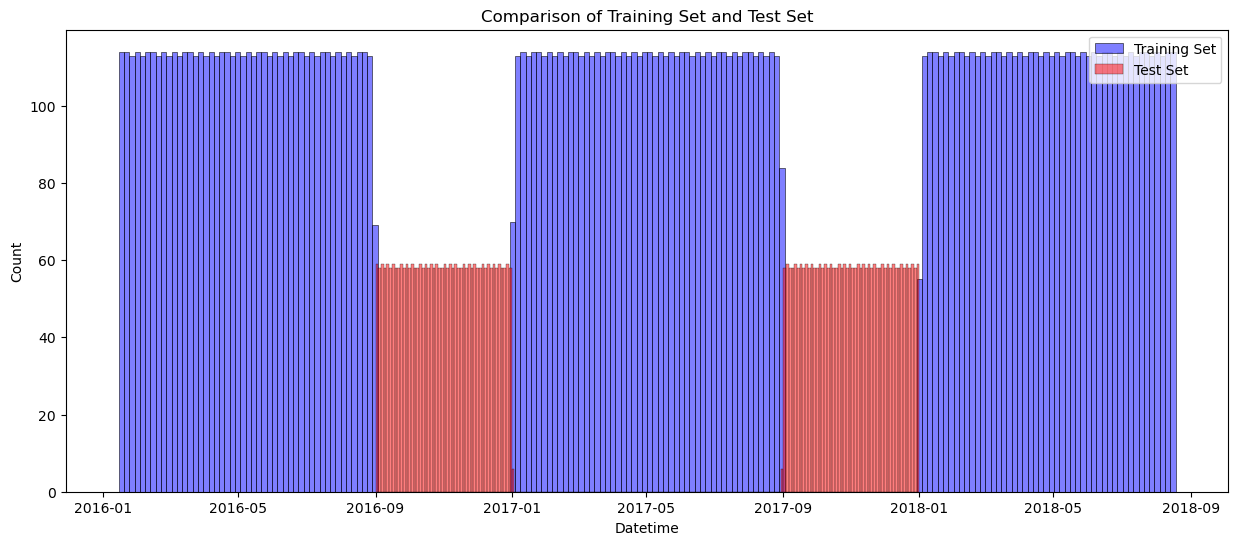

In [56]:
plt.figure(figsize=(15, 6))
sns.histplot(data=train_df, x='date', bins=200, color='blue', alpha=0.5, label='Training Set')
sns.histplot(data=test_df, x='date', bins=200, color='red', alpha=0.5, label='Test Set')

plt.title('Comparison of Training Set and Test Set')
plt.xlabel('Datetime')
plt.ylabel('Count')

plt.legend()
plt.show()

This plot helps me visually compare the distribution of dates in the training and test sets, I can see if there is a similar distribution or if there are any gaps in between which there are. It seems like both the training set and and the test set contain different times frames of the full dataframe. 

In [57]:
train_df.iloc[5518:5523, 0:3]

date  final.output.concentrate_ag  \
5518 2016-08-31 21:59:59                     5.664237   
5519 2016-08-31 22:59:59                     6.066618   
5520 2016-08-31 23:59:59                     7.108574   
5521 2017-01-01 00:59:59                     9.849632   
5522 2017-01-01 01:59:59                     8.415084   

      final.output.concentrate_pb  
5518                    10.021368  
5519                     9.908392  
5520                    10.110568  
5521                     8.437286  
5522                     8.927103

In [58]:
test_df.iloc[2925:2930, 0:3]

date  primary_cleaner.input.sulfate  \
2925 2016-12-31 21:59:59                     132.630897   
2926 2016-12-31 22:59:59                     127.775871   
2927 2016-12-31 23:59:59                     127.135359   
2928 2017-09-01 00:59:59                     189.345462   
2929 2017-09-01 01:59:59                     199.767960   

      primary_cleaner.input.depressant  
2925                          8.998328  
2926                          8.979377  
2927                          8.981477  
2928                          5.997663  
2929                          5.934489

I used iloc to look at a small part of each dataframe here 

### Checking that Recovery is Calculated Correctly. 

- Using the training set, calculating recovery for the rougher.output.recovery feature. Then finding the MAE between my calculations and the feature values.


In [59]:
# Make a subset to drop N/A easily
subset_columns = ['rougher.output.recovery', 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']
subset_for_calculating_recovery = train_df.loc[:, subset_columns].dropna(axis=0)
subset_for_calculating_recovery.shape

(14287, 4)

Specifying the columns that are relevant for calculating recovery

    - rougher.output.recovery: The recovery value you want to validate.
    - rougher.output.concentrate_au: The concentration of gold in the rougher concentrate.
    - rougher.input.feed_au: The concentration of gold in the rougher feed.
    - rougher.output.tail_au: The concentration of gold in the rougher tails.

I also created a new data frame called subset_for_calculating_recovery that contains only the relevant columns from the training dataframe. I then also dropped any rows that conatained misisng values because we already have plenty of data. 
    

In [60]:
C = subset_for_calculating_recovery['rougher.output.concentrate_au']
F = subset_for_calculating_recovery['rougher.input.feed_au']
T = subset_for_calculating_recovery['rougher.output.tail_au']
subset_for_calculating_recovery['rougher.output.recovery.manually'] = 100 * ((C*(F-T))/(F*(C-T)))
subset_for_calculating_recovery.head()

rougher.output.recovery  rougher.output.concentrate_au  \
0                87.107763                      19.793808   
1                86.843261                      20.050975   
2                86.842308                      19.737170   
3                87.226430                      19.320810   
4                86.688794                      19.216101   

   rougher.input.feed_au  rougher.output.tail_au  \
0               6.486150                1.170244   
1               6.478583                1.184827   
2               6.362222                1.162562   
3               6.118189                1.079755   
4               5.663707                1.012642   

   rougher.output.recovery.manually  
0                         87.107763  
1                         86.843261  
2                         86.842308  
3                         87.226430  
4                         86.688794

Key Terms:

    - Rougher Output Recovery 
        - Refers to the percentage of gold recovered from the raw feed during the rougher flotation process 
        - It measures the efficiency of the initial stage of the gold extraction process. Higher recovery rates mean more gold is extracted from the raw ore, making the process more efficient and profitable 
        
    - Rougher Output Concentrate 
        - The concentration of gold in the rougher concentrate after the flotation process 
        - This value indicates how much gold is present in the concentrated product after the rougher flotation. It is a key factor in calculating the recvovery rate. 
        
    - Rougher Input Feed 
        - The concentration of gold in the raw feed before the flotation process
        - This is the starting amount of gold in the ore that enters the flotation process. It is used as a baseline to measure how much gold is recovered 
        
    - Rougher Output Tail
        - This is the concentration of gold in the rougher tails after the flotation process
        - This represents the amount of gold that remains in the waste material after the rougher flotation. Ideaally, this value should be low, indicating that most of the gold has been recovered in the concentrate. 
        
        

Finding MAE now between the calculations and feature values 

In [61]:
recovery_mae = mean_absolute_error(subset_for_calculating_recovery['rougher.output.recovery'],subset_for_calculating_recovery['rougher.output.recovery.manually'])
print(recovery_mae)

9.303415616264301e-15


The result of the MAE is very small indicating that the original recovery is calculated well. I will use the original dataframe for the next steps

Analysis of the Training DataFrame with regard to caluclating the recovery of Rougher Process(Flotation) and whether its correct:

    - The MAE Value above indicates an extremely small error between the calculated recovery and the actual recovery values, suggesting the calculation was correct. meaning the calculated recovery values are almost identical to the actual recovery values in the dataset, high accuracy.


This formula: ![image-3.png](attachment:image-3.png)

Simulates the process of recovering gold from gold ore 
-	Using the following formula to simulate the recovery process:

    -I calculated the rougher output recovery rate, which is the measure of how much gold is recovered from the ore after the rougher process. And the caluclation above does that for us. 
    
    C : Is the concentration of god in th erougher output concentrate 
    F : Is the concentration of gold in the rougher input feed.
    T : Is the concentration of gold in the rougher output tails.
    
    



### Analyzing the features not available in the test set

In [62]:
train_columns = train_df.columns
test_columns = test_df.columns
columns_differ1 = train_columns[~np.isin(train_columns, test_columns)]
columns_differ2 = test_columns[~np.isin(test_columns, train_columns)]
print(len(columns_differ1), len(columns_differ2))

columns_differ2

34 0


Index([], dtype='object')

I extracted the column names from the training and test dataframes and stored them in two variables. 

I used np.isnin ~ to find which columns are in the training set but not the test set and vice versa.
     
    - columns_differ1 contains columns present in the training set but missing in the test set 
    - columns_differ2 contains columns present in the test set but missing in the training set.
    
I then used len to print out the number of columns that differ between the training and test DataFrames. This output indicates that there are columns present in one set but not the other. 


There are 34 columns in the training dataframe that are not in the test dataframe

The features that are missing in the test dataframe are the 'ouput' and 'calculation'. The target columns, 'recovery' are not in the test file either.

## Analyzing Data

### Understanding how concentrations of metals (Au, Ag, Pb) change depending on the purification stage

In [63]:
import plotly.express as px

In [64]:
# Defining the stages and metals 

stages = ["rougher.output.", "primary_cleaner.output.", "final.output."]
metals = ['concentrate_au', 'concentrate_ag', 'concentrate_pb']

concentrate_au_stages = [stage + metals[0] for stage in stages]
concentrate_ag_stages = [stage + metals[1] for stage in stages]
concentrate_pb_stages = [stage + metals[2] for stage in stages]

metal_stages = {
    'AU': concentrate_au_stages,
    'AG': concentrate_ag_stages,
    'PB': concentrate_pb_stages
}


I listed out the stages of representing levels of the purification process. As well as the metals which represents each type of metal I am ineterested in (Gold, Silver and Lead).

We chose the output columns because they represent each stage of the purification process. These columns show the concentration of metals after each stage (hence the output of every stage).


I used a list comprehension to create a lists of column names for each metal at each stage. 

    - For example for the concentrate_au_stages it will include the columns 
        - rougher.output.concentrate_au, primary_clean.output_concentrate_au and final.output.concentrate_au 
            - All the columns from the stages variable I made 
            
I lastly created a dictionary which will be used for my graph below. Where each key is a metal type (AU, AG, PB) and the value is the corresponding list of columns for that metal across different stages. 

In [65]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(
    rows=3, cols=1, 
    subplot_titles=("Concentrate AU", "Concentrate AG", "Concentrate PB")
)


row = 1
for metal, columns in metal_stages.items():
    for stage in columns:
        fig.add_trace(
            go.Box(y=train_df[stage], name=stage, boxpoints='outliers'),
            row=row, col=1
        )
    row += 1


fig.update_layout(
    title_text="Metal Concentrations at Different Purification Stages",
    height=900,
    showlegend=True
)


fig.show()

We can conclude from the box plots that as the purification process goes to its final.output stage for AU (Gold) its increasing its concentration while for AG (Silver) its decreasing. For PB (lead) it relatively stays the same but is slightly increasing in concentration as well.

- Gold(AU)
    - As the purification process progresses, the percentage of gold in the concentrate increases. Which means that the gold is more effectively being seperated from other materials and impurities. 
    
- Silver (AG)
    - As the purification process progresses, the percetage of silver decreases in concentration. 
    - This means that silver is being removed as an impurity and not as effectively cocentrated as gold in the final stages
    
- Lead (Pb)
    - The percentage of lead in the concentrate shows a slight increase, although it remains relatively stable
    - The slight increase indicates that the percentage of lead slighlt increases. Which means that as the process progresses lead is being seperated better from other materials and impurities.


### Comparing the feed particle size distributions between the training set and the test set

There are two feed particle procesesses in both train and test files, they are 'rougher.input.feed_size' and 'primary_cleaner.input.feed_size'

In [66]:
feed_size_columns = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']

rougher_feed_size = pd.DataFrame({'Train': train_df[feed_size_columns[0]], 'Test': test_df[feed_size_columns[0]]})
primary_feed_size = pd.DataFrame({'Train': train_df[feed_size_columns[1]], 'Test': test_df[feed_size_columns[1]]})

Defining a list of columns that contain the feed particle sizes for the rougher and primary cleaner processes. Then I created two seperate dataframes for comparison. 

    -rougher_feed_size contains the rougher input feed sizes for both the training and test sets.
        - the paricle size as it enters the rougher flotation process
        
    -primary_feed_size contains the primary cleaner input feed sizes for both the training and test sets.
        - the particle size of the material as it enters the primary cleaner stage
    

Feed particle size refers to the size of the particles in the material ore that is fed into various stages of the gold extraction process. The size of these particles can significantly impact the efficiency of the seperation and purification processes. 



c:\Users\oli_worth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\oli_worth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\oli_worth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\oli_worth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



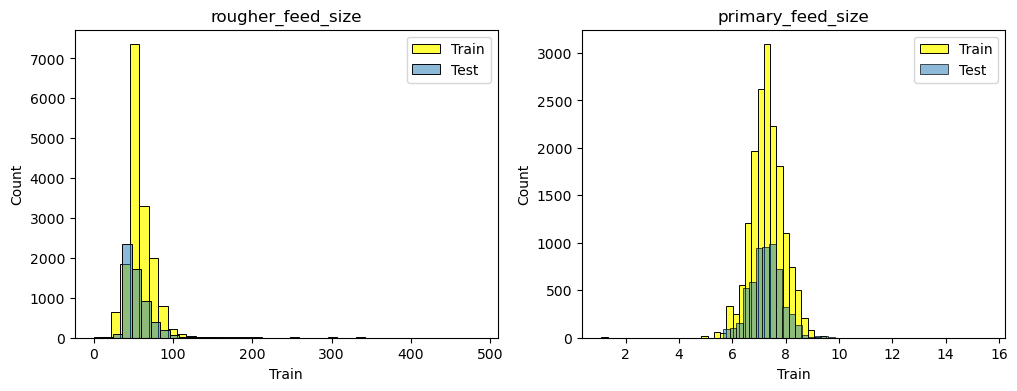

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.histplot(rougher_feed_size['Train'], bins=40, label="Train", color='yellow', kde=False, ax=axes[0])
sns.histplot(rougher_feed_size['Test'], bins=40, label="Test", alpha=0.5, kde=False, ax=axes[0])
sns.histplot(primary_feed_size['Train'], bins=40, label="Train", color='yellow', kde=False, ax=axes[1])
sns.histplot(primary_feed_size['Test'], bins=40, label="Test", alpha=0.5, kde=False, ax=axes[1])

axes[0].set_title('rougher_feed_size')
axes[1].set_title('primary_feed_size')
axes[0].legend()
axes[1].legend()

plt.show()

I note that for rougher_feed_size, the train and test set are both skewed to the right meaning more smaller values and less larger values. However the mean of the training set is a little bit more than the test set. For primary_feed_size it looks like the distribution is very similar. 

To introduce another measurement to look at it further I will use a hypotehsis test. Specifcally the Kolmogorov-Smirnov test, it can test whether two samples have similar distributions. 

H0: The means of distributions of these two sets are the same

H1: The means of distributions of these two sets are not the same

In [68]:
def ks_test(a, b):
    alpha = 0.05

    results = st.kstest(a, b)
    
    print('p-value:', results.pvalue)

    if results.pvalue < alpha:
        print("We reject the null hypothesis")
    else:
        print("We can't reject the null hypothesis")

Rougher Test 

In [69]:
rougher_test = rougher_feed_size['Test'].dropna()
rougher_train = rougher_feed_size['Train'].dropna()
ks_test(rougher_test, rougher_train)

p-value: 5.871332318176002e-140
We reject the null hypothesis


Primary Cleaner

In [70]:
primary_train = primary_feed_size['Train'].dropna()
primary_test = primary_feed_size['Test'].dropna()
ks_test(primary_train, primary_test)

p-value: 1.20224761832344e-10
We reject the null hypothesis


According to the results, the feed size between training and test sets are different distributively in both Rougher and Primary Cleaner Stages

To demonstrate the validity of the K-S Test. I will create dummy datasets that have known distributions. By comparing datasets using the K-Test, I can validate whether the test is correct identifying similar distributions.

In [71]:
trial_df = full_df[['date', 'rougher.input.feed_size', 'primary_cleaner.input.feed_size', 'final.output.recovery']].dropna()

# Splitting the dataframes into training and test sets 

trial_X = trial_df.drop('final.output.recovery', axis=1)
trial_y = trial_df['final.output.recovery']
trial_X_train, trial_X_test, trial_y_train, trial_y_test = train_test_split(trial_X, trial_y, test_size=0.3, random_state=42)

# Creating a dataframe for rougher and primary cleaner feed sizes 
trial_rougher_feed_size = pd.DataFrame({'Train': trial_X_train['rougher.input.feed_size'], 'Test': trial_X_test['rougher.input.feed_size']})
trial_primary_feed_size = pd.DataFrame({'Train': trial_X_train['primary_cleaner.input.feed_size'], 'Test': trial_X_test['primary_cleaner.input.feed_size']})

Purpose: 

    - To create dummy datasets with known distributions to validate the results of the K-S test. By doing this I can accurately depict whether the two distributions are similar or different
    
Code:

I split trial_df into features trial_x and trial_y and the target is the final.output recovery

I created then two dataframes to compare the feed sizes between rougher and primary for the trainig and test sets. 
    

c:\Users\oli_worth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\oli_worth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\oli_worth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\oli_worth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



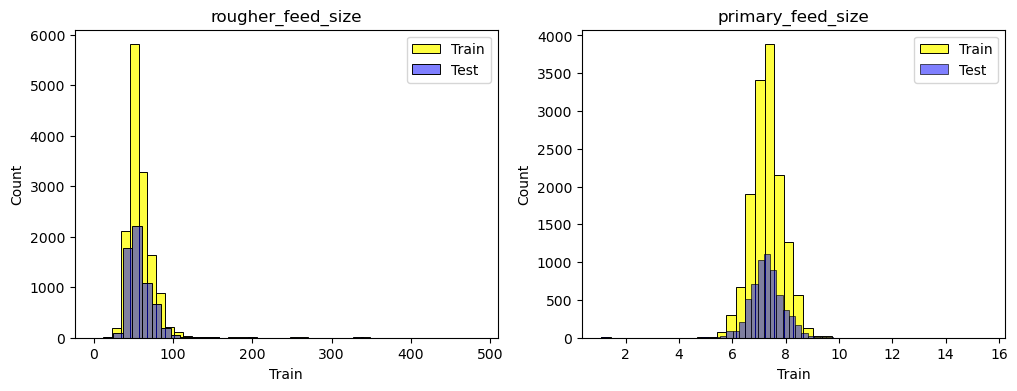

In [72]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))


sns.histplot(trial_rougher_feed_size['Train'], bins=40, label="Train", color='yellow', kde=False, ax=axes[0])
sns.histplot(trial_rougher_feed_size['Test'], bins=40, label="Test", color='blue', alpha=0.5, kde=False, ax=axes[0])


sns.histplot(trial_primary_feed_size['Train'], bins=40, label="Train", color='yellow', kde=False, ax=axes[1])
sns.histplot(trial_primary_feed_size['Test'], bins=40, label="Test", color='blue', alpha=0.5, kde=False, ax=axes[1])


axes[0].set_title('rougher_feed_size')
axes[1].set_title('primary_feed_size')
axes[0].legend()
axes[1].legend()

plt.show()


Distributions look a bit more similar 

In [73]:
ks_test(trial_X_train['rougher.input.feed_size'], trial_X_test['rougher.input.feed_size'])

p-value: 0.0557964676197612
We can't reject the null hypothesis


In [74]:
ks_test(trial_X_train['primary_cleaner.input.feed_size'], trial_X_test['primary_cleaner.input.feed_size'])

p-value: 0.41494799061008825
We can't reject the null hypothesis


Using dummy datasets and splitting them into training and test data and this time the hypotehsis tests came to the conclusion through our same k test that these two sets of data between the training dataframe and the testing datafrme were with similar distribution hence the we cant reject the null hypothesis. Meaning we cant definitively say that they are in fact different. 


    - I performed the K-S test on both my actual datasets (training and test sets) and on dummy datasets created by splitting the full dataset into trainig and test sets. The results differ between the two approaches.
    
    - When to use K-S test from now on: use the K-S to validate whether two data sets in this case training and test sets come from similar distributions, especially if the originate from different sources or prepared seperately.
    
    - If I split a single dataset into training and test sets, the distributions should inherently be similar, and the K-S test confirmed this. 

### Considering the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Abnormalities and whether its best to remove such values from both samples 

In [75]:
final_concentrate = full_df[['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb']]
final_concentrate['sum'] = full_df['final.output.concentrate_ag'] + full_df['final.output.concentrate_au'] + full_df['final.output.concentrate_pb']



final_concentrate

C:\Users\oli_worth\AppData\Local\Temp\ipykernel_24372\3031089550.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



final.output.concentrate_ag  final.output.concentrate_au  \
0                         6.055403                    42.192020   
1                         6.029369                    42.701629   
2                         6.055926                    42.657501   
3                         6.047977                    42.689819   
4                         6.148599                    42.774141   
...                            ...                          ...   
22711                     3.224920                    46.713954   
22712                     3.195978                    46.866780   
22713                     3.109998                    46.795691   
22714                     3.367241                    46.408188   
22715                     3.598375                    46.299438   

       final.output.concentrate_pb        sum  
0                         9.889648  58.137072  
1                         9.968944  58.699942  
2                        10.213995  58.927421  
3                         9.977019  58.714815  
4                        10.142511  59.065251  
...                            ...        ...  
22711                    11.356233  61.295107  
22712                    11.349355  61.412113  
22713                    11.434366  61.340054  
22714                    11.625587  61.401016  
22715                    11.737832  61.635645  

[22716 rows x 4 columns]

I am analyzing different concentrations of different metals at the final concentration stage of the extraction process. This involves calculatng the sum of these concentrations and identifying any abnormalities.

Therefor I created a dataframe final_concentrate by selecting the columns representing the concentrations of silver gold and lead in the final output. I calculated the sum of the cocnentrations and stored it in a new column called sum. Representing the total concentration of all three metals in the final output.



In [76]:
# Creating function to get total concentration of all metals at certain stages.

def metal_concen_sum(df, stage):
    metal_handles = ['_ag', '_au', '_pb']
    total_concen = df[stage+metal_handles[0]] + df[stage+metal_handles[1]] + df[stage+metal_handles[2]]
    return total_concen

c:\Users\oli_worth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\oli_worth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\oli_worth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



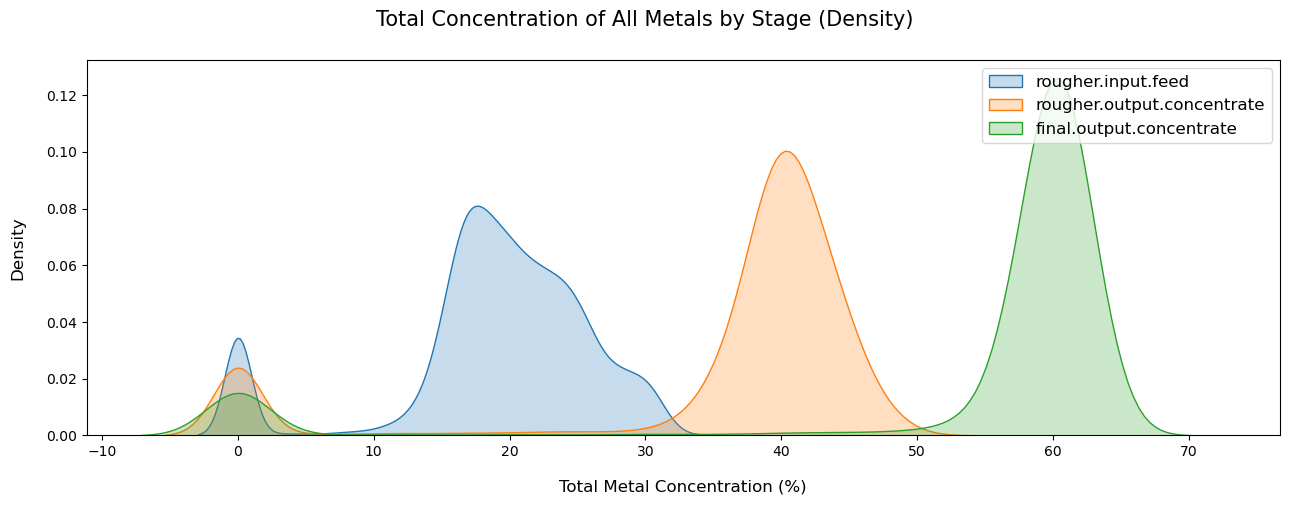

In [77]:
# Creating plot to visualize total concentration of all metals at certain stages.
fig = plt.figure(figsize=(13, 5))
fig.suptitle('Total Concentration of All Metals by Stage (Density)', fontsize=15, y=1)

sns.kdeplot(metal_concen_sum(full_df, 'rougher.input.feed'), label='rougher.input.feed', fill=True)
sns.kdeplot(metal_concen_sum(full_df, 'rougher.output.concentrate'), label='rougher.output.concentrate', fill=True)
sns.kdeplot(metal_concen_sum(full_df, 'final.output.concentrate'), label='final.output.concentrate', fill=True)
plt.legend(fontsize=12)
plt.xlabel('Total Metal Concentration (%)', fontsize=12, labelpad = 15)
plt.ylabel('Density', fontsize=12, labelpad=15)
    
plt.tight_layout()
plt.show()

Function purpose: The function calculates the total concentration of silver, gold and lead at a given stage, the stages I defined prior. metal_handles is a list containing the suffixes for the metals. and total_concen of silver, gold, and lead at the specified stage. And dthe function returns total concentration.

I then created a histogram that visualizes the total concentration of metals and how the change through the stages of the process. 

By looking at the density plots I identified abnormal values.



There are many zero values that indicate outliers that shouldnt be there 

In [78]:
final_concentrate[final_concentrate['final.output.concentrate_ag']==0]

final.output.concentrate_ag  final.output.concentrate_au  \
99                             0.0                          0.0   
100                            0.0                          0.0   
101                            0.0                          0.0   
102                            0.0                          0.0   
103                            0.0                          0.0   
...                            ...                          ...   
17912                          0.0                          0.0   
17913                          0.0                          0.0   
17914                          0.0                          0.0   
17915                          0.0                          0.0   
17916                          0.0                          0.0   

       final.output.concentrate_pb  sum  
99                             0.0  0.0  
100                            0.0  0.0  
101                            0.0  0.0  
102                            0.0  0.0  
103                            0.0  0.0  
...                            ...  ...  
17912                          0.0  0.0  
17913                          0.0  0.0  
17914                          0.0  0.0  
17915                          0.0  0.0  
17916                          0.0  0.0  

[1613 rows x 4 columns]

In [79]:
full_df[full_df['rougher.input.feed_au']==0]

date  final.output.concentrate_ag  \
99    2016-01-19 03:00:00                          0.0   
100   2016-01-19 04:00:00                          0.0   
101   2016-01-19 05:00:00                          0.0   
102   2016-01-19 06:00:00                          0.0   
103   2016-01-19 07:00:00                          0.0   
...                   ...                          ...   
17908 2018-01-30 03:59:59                          0.0   
17909 2018-01-30 04:59:59                          0.0   
17910 2018-01-30 05:59:59                          0.0   
17911 2018-01-30 06:59:59                          0.0   
17912 2018-01-30 07:59:59                          0.0   

       final.output.concentrate_pb  final.output.concentrate_sol  \
99                             0.0                           0.0   
100                            0.0                           0.0   
101                            0.0                           0.0   
102                            0.0                           0.0   
103                            0.0                           0.0   
...                            ...                           ...   
17908                          0.0                           0.0   
17909                          0.0                           0.0   
17910                          0.0                           0.0   
17911                          0.0                           0.0   
17912                          0.0                           0.0   

       final.output.concentrate_au  final.output.recovery  \
99                             0.0                    NaN   
100                            0.0                    NaN   
101                            0.0                    NaN   
102                            0.0                    NaN   
103                            0.0                    NaN   
...                            ...                    ...   
17908                          0.0                    NaN   
17909                          0.0                    NaN   
17910                          0.0                    NaN   
17911                          0.0                    NaN   
17912                          0.0                    NaN   

       final.output.tail_ag  final.output.tail_pb  final.output.tail_sol  \
99                      0.0                   0.0                    0.0   
100                     0.0                   0.0                    0.0   
101                     0.0                   0.0                    0.0   
102                     0.0                   0.0                    0.0   
103                     0.0                   0.0                    0.0   
...                     ...                   ...                    ...   
17908                   0.0                   0.0                    0.0   
17909                   0.0                   0.0                    0.0   
17910                   0.0                   0.0                    0.0   
17911                   0.0                   0.0                    0.0   
17912                   0.0                   0.0                    0.0   

       final.output.tail_au  ...  secondary_cleaner.state.floatbank4_a_air  \
99                      0.0  ...                                 13.985160   
100                     0.0  ...                                 14.034374   
101                     0.0  ...                                 13.943929   
102                     0.0  ...                                 14.040873   
103                     0.0  ...                                 13.972371   
...                     ...  ...                                       ...   
17908                   0.0  ...                                 20.005303   
17909                   0.0  ...                                 19.962859   
17910                   0.0  ...                                 20.017100   
17911                   0.0  ...                                 19.947963   
179

Looking at the dataframes and the distribution chart I could tell a lot of values were equivelent to zero which obviously doesnt make much sense. Then taking a deeper look at the sepcific data those with values of 0 also created NaN values for our target 'final.output.recovery' therefore i must deal with them

### Addressing the NaN values and zero value outliers

#### Test Set

In [80]:
test_df = pd.merge(test_df, full_df[['date', 'rougher.output.recovery', 'final.output.recovery']], left_on='date', right_on='date', how='left')

I merged the test dataset with recovery values from the full dataset to esnure I have the target variables for my test data which was already present in train.

In [81]:
test_df.shape

(5856, 55)

In [82]:
mask = (test_df['rougher.input.feed_ag'] == 0) | (test_df['rougher.input.feed_pb'] == 0) | (test_df['rougher.input.feed_au'] == 0)

In [83]:
test_df = test_df[~mask]
test_df.shape

(5487, 55)

In [84]:
test_df.isna().sum()

date                                            0
primary_cleaner.input.sulfate                  30
primary_cleaner.input.depressant               33
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                 30
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        23
rougher.input.feed_size                        17
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate              27


We cannot train models if the targets are missing, so I am going to drop all NaN values in target columns

In [85]:
test_df.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)

In [86]:
test_df.fillna(method='ffill', inplace=True)

C:\Users\oli_worth\AppData\Local\Temp\ipykernel_24372\277758564.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [87]:
test_df.shape

(5290, 55)

I created a Mask for Zero values to identify rows where any of the key input feed columns have zero values. Then created my new dataframe to not include those and I then dropped rows were the target values were mssing. I then filled in any remaining missing values using foward fill. This method fills NaN values with the last known non null value in the same column.

#### Training set

In [88]:
train_df.shape

(16860, 87)

In [89]:
columns = test_df.columns
train_df = train_df[columns]
train_df.shape

(16860, 55)

In the training set there are 34 extra columns that are not in the test set. The model will not fit the test set if I keep them, So I will delete them and keep the same features in both the training and test set.

I will also deal with zero values and misisng values the same way I did with the test set

In [90]:
# Deleting the zero values in feed metal columns
mask_train = (train_df['rougher.input.feed_ag'] == 0) | (train_df['rougher.input.feed_pb'] == 0) | (train_df['rougher.input.feed_au'] == 0)
train = train_df[~mask_train]

# Dropping missing values in target columns
train_df.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)

# Filling missing values in other columns
train_df.fillna(method='ffill', inplace=True)

C:\Users\oli_worth\AppData\Local\Temp\ipykernel_24372\3964188681.py:9: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [91]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 0 to 16859
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        14149 non-null  datetime64[ns]
 1   primary_cleaner.input.sulfate               14149 non-null  float64       
 2   primary_cleaner.input.depressant            14149 non-null  float64       
 3   primary_cleaner.input.feed_size             14149 non-null  float64       
 4   primary_cleaner.input.xanthate              14149 non-null  float64       
 5   primary_cleaner.state.floatbank8_a_air      14149 non-null  float64       
 6   primary_cleaner.state.floatbank8_a_level    14149 non-null  float64       
 7   primary_cleaner.state.floatbank8_b_air      14149 non-null  float64       
 8   primary_cleaner.state.floatbank8_b_level    14149 non-null  float64       
 9   primary_cle

## Building the Model

Before I build the model we have two targets in this project not one. A normal regression model only can have one target, but in this project we have many.

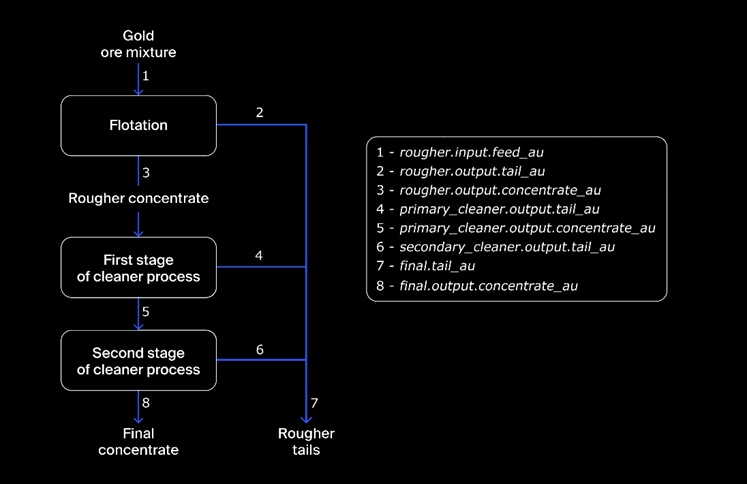





In [92]:
def smape(y_true, y_pred):
    """
    Calculating the Symmetric Mean Absolute Percentage Error (sMAPE).
    
    Parameters:
    y_true (array-like): True values
    y_pred (array-like): Predicted values
    
    Returns:
    float: sMAPE value
    """
    numerator = np.abs(y_pred - y_true) # This function computes the aboslute differences between the predicted and true values.
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

def final_smape(rougher_true, rougher_pred, final_true, final_pred):
    """
    Calculate the final sMAPE based on the weighted average of rougher and final sMAPE.
    
    Parameters:
    rougher_true (array-like): True values for rougher output
    rougher_pred (array-like): Predicted values for rougher output
    final_true (array-like): True values for final output
    final_pred (array-like): Predicted values for final output
    
    Returns:
    float: Final sMAPE value
    """
    smape_rougher = smape(rougher_true, rougher_pred)
    smape_final = smape(final_true, final_pred)
    final_smape_value = 0.25 * smape_rougher + 0.75 * smape_final
    return final_smape_value


sMAPE and final sMAPE functions 

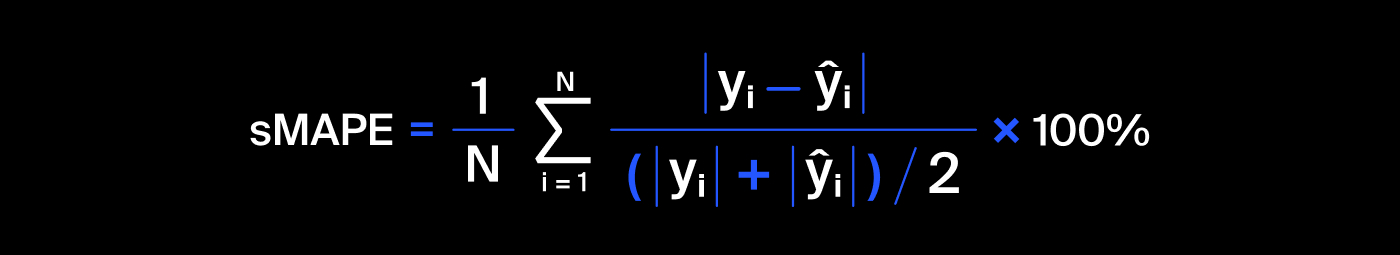 

Explanation of sMAPE: sMAPE helps me measure the difference between what i predicted through my model and what actually happened. 

The calculation works like this say on Monday I predicted I would sell 10 toys and instead i actually sold 12. And on tuesday I predicted I would sell 7 but instead I sold 8. Here is how the sMAPE would work:

    - Difference | 12 - 10 | = 2  
    - Average | (12 + 10) / 2 = 11
    - sMAPE for Monday: 2/11 x 100 = 18.18%
    
    - Difference |7-8| = 1
    - Average: |7+8| / 2 = 7.5
    - sMAPE for Tuesday: 1/7.5 x 100 = 13.33%
    
    - To get the average for these two days you just average the two percentages 
    - 18.18 + 13.33 / 2 = 15.76%
    - This means on average my prediction was off by 15.76% 


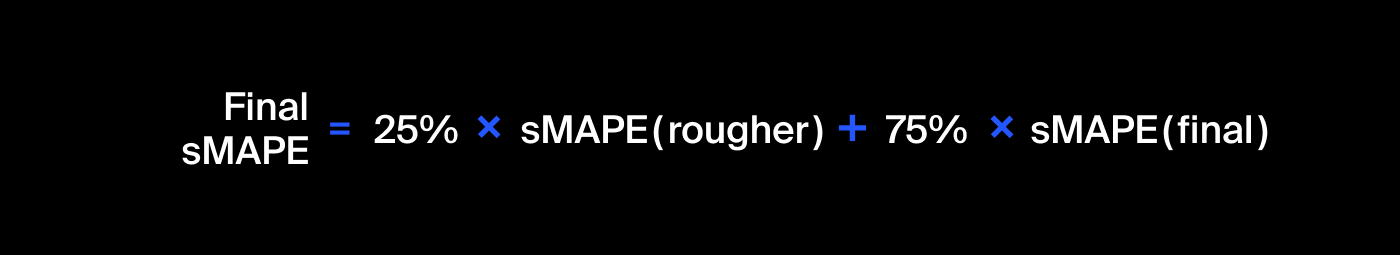

    - Final sMAPE is the same thing however were just giving more importance to one of the predictions to give me an overall error message we care mor about the final than the rougher process

In [93]:
train_df = train_df.drop(columns='date')
test_df = test_df.drop(columns='date')

In [94]:
features = train_df.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [95]:
target_rougher = train_df['rougher.output.recovery']
target_final = train_df['final.output.recovery']

In [96]:
# Split the data into training and validation sets for rougher.output.recovery
X_train_rougher, X_val_rougher, y_train_rougher, y_val_rougher = train_test_split(
    features, target_rougher, test_size=0.2, random_state=42
)

# Split the data into training and validation sets for final.output.recovery
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
    features, target_final, test_size=0.2, random_state=42
)

In [98]:
# Linear Regression for Rougher Output
lr_model_rougher = LinearRegression()
lr_model_rougher.fit(X_train_rougher, y_train_rougher)

# Linear Regression for Final Output
lr_model_final = LinearRegression()
lr_model_final.fit(X_train_final, y_train_final)


LinearRegression()

In [99]:
# Decision Tree for Rougher Output
dt_model_rougher = DecisionTreeRegressor(random_state=42)
dt_model_rougher.fit(X_train_rougher, y_train_rougher)

# Decision Tree for Final Output
dt_model_final = DecisionTreeRegressor(random_state=42)
dt_model_final.fit(X_train_final, y_train_final)


DecisionTreeRegressor(random_state=42)

In [100]:
# Random Forest for Rougher Output
rf_model_rougher = RandomForestRegressor(random_state=42)
rf_model_rougher.fit(X_train_rougher, y_train_rougher)

# Random Forest for Final Output
rf_model_final = RandomForestRegressor(random_state=42)
rf_model_final.fit(X_train_final, y_train_final)


RandomForestRegressor(random_state=42)

Now we will use the validation sets to make predictions and calculate the sMAPE for each model

In [101]:
# Predicting with Linear Regression
lr_pred_rougher = lr_model_rougher.predict(X_val_rougher)
lr_pred_final = lr_model_final.predict(X_val_final)

# Calculating sMAPE for Linear Regression
lr_smape_rougher = smape(y_val_rougher, lr_pred_rougher)
lr_smape_final = smape(y_val_final, lr_pred_final)

print(f"Linear Regression Rougher sMAPE: {lr_smape_rougher}")
print(f"Linear Regression FInal sMAPE: {lr_smape_final}")

Linear Regression Rougher sMAPE: 10.31434759350435
Linear Regression FInal sMAPE: 8.875542799651098


In [102]:
# Predicting with Decision Tree
dt_pred_rougher = dt_model_rougher.predict(X_val_rougher)
dt_pred_final = dt_model_final.predict(X_val_final)

# Calculating sMAPE for Decision Tree
dt_smape_rougher = smape(y_val_rougher, dt_pred_rougher)
dt_smape_final = smape(y_val_final, dt_pred_final)

print(f"Decision Tree Rougher sMAPE: {dt_smape_rougher}")
print(f"Decision Tree Final sMAPE: {dt_smape_final}")

Decision Tree Rougher sMAPE: 7.966830627438785
Decision Tree Final sMAPE: 8.999869337440305


In [103]:
# Predicting with Random Forest
rf_pred_rougher = rf_model_rougher.predict(X_val_rougher)
rf_pred_final = rf_model_final.predict(X_val_final)

# Calculating sMAPE for Random Forest
rf_smape_rougher = smape(y_val_rougher, rf_pred_rougher)
rf_smape_final = smape(y_val_final, rf_pred_final)

print(f"Random Forest Rougher sMAPE: {rf_smape_rougher}")
print(f"Random Forest Final sMAPE: {rf_smape_final}")



Random Forest Rougher sMAPE: 7.795926767477303
Random Forest Final sMAPE: 6.4801209349600555


### Cross Validation

In [109]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)


In [116]:
def smape_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    numerator = np.abs(y_pred - y)
    denominator = (np.abs(y) + np.abs(y_pred)) / 2
    return -np.mean(numerator / denominator) * 100

# New sMAPE scorer which is used to evaluate each model simulatenously in one for loop instead od foing each individually. Its so I can include each model at the same time

In [117]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    rougher_scores = cross_val_score(model, features, target_rougher, cv=cv, scoring=smape_scorer)
    final_scores = cross_val_score(model, features, target_final, cv=cv, scoring=smape_scorer)
    combined_score = 0.25 * np.mean(rougher_scores) + 0.75 * np.mean(final_scores)
    results[name] = {
        'rougher_smape': -np.mean(rougher_scores),
        'final_smape': -np.mean(final_scores),
        'combined_smape': -combined_score
    }

for name, result in results.items():
    print(f"{name} - Rougher sMAPE: {result['rougher_smape']:.4f}, Final sMAPE: {result['final_smape']:.4f}, Combined sMAPE: {result['combined_smape']:.4f}")


Linear Regression - Rougher sMAPE: 10.1373, Final sMAPE: 9.0349, Combined sMAPE: 9.3105
Decision Tree - Rougher sMAPE: 7.7419, Final sMAPE: 9.5186, Combined sMAPE: 9.0745
Random Forest - Rougher sMAPE: 7.8182, Final sMAPE: 6.6961, Combined sMAPE: 6.9766


Analysis:

- I dropped the Date columns because the model will not run unless the data types are numerical. I also didnt thik that th edate column really matters when it comes to predictions. 

- I seperated my features and targets with the train df

- I split the training data into a training set and a validation set 

    -and created three different models, linear regression, decision tree and Random forest. I then used the sMAPE test for each model to see which one was the best for the training dataframe.
    
    By building and evaluating the models using sMAPE I ensure a throurough assessment of the models performances. Which helps identify the best model for predicting both rougher and final recovery in the gold extraction process. Which will be done with the test set.


Cross Validation
- Cross validation is designed to perform on multiple models to determine which one performs the best based on the Symmetric Mean Abolsute Percentage 

-   Breaking it down:

-  I implemented the cross validation function from sklearn and KFOLD which is a cross validator that divides the data into kfolds

Evaluation Using Cross Validation
-   I used a for loop which loops through each model in the models dictionary

- Rougher_scores: Performs cross validation on the model using featres and target_rougher. The scoring=smape parameter calcualtes the sMAPE for each fold.
- final_scores:: performs cross-validation on the model using features and target_final. The same sMAPE is calculated for each fold.
- The combined score: Calcuation with the weight average of the rougher and final sMAPE scores, giving 25% weight to rougher and 75% weight to final sMAPE.

- Storing Results
    - results[name]: stores the results in the results dictionary with the following values:

'rougher_smape': -np.mean(rougher_scores): Average sMAPE for rougher output (negative because cross_val_score returns negative values for loss functions).

'final_smape': -np.mean(final_scores): Average sMAPE for final output (negative because cross_val_score returns negative values for loss functions).

'combined_smape': -combined_score: Combined sMAPE score (negative for consistency).

Why its important to use Cross Validation to determine which model is best?

-   It ensures the models performance is not dependent on the specific train dataframe


Now lets move on to selecting the best model based on the sMAPE values and testing it on the test_df dataset. Based on the sMAPE values from the training set, the Random Forest model seems to perform the best for both the rougher and the final concentrate recovery predictions. We will use the Rnadom Forest model to make predictions on the test dataset

In [118]:
train_df.shape

(14149, 54)

In [119]:
# Separating features in the test dataset
test_features = test_df.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

# Preparing target variables for the test dataset
test_target_rougher = test_df['rougher.output.recovery']
test_target_final = test_df['final.output.recovery']

In [120]:
# Predicting with Random Forest on the test data
rf_test_pred_rougher = rf_model_rougher.predict(test_features)
rf_test_pred_final = rf_model_final.predict(test_features)

# Calculating sMAPE for Random Forest on the test data
rf_test_smape_rougher = smape(test_target_rougher, rf_test_pred_rougher)
rf_test_smape_final = smape(test_target_final, rf_test_pred_final)

print(f"Random Forest Test Rougher sMAPE: {rf_test_smape_rougher}")
print(f"Random Forest Test Final sMAPE: {rf_test_smape_final}")

Random Forest Test Rougher sMAPE: 14.439905138391687
Random Forest Test Final sMAPE: 10.336197422514429


In [121]:
# Final sMAPE calculation
final_smape_value = 0.25 * rf_test_smape_rougher + 0.75 * rf_test_smape_final
print(f"Final sMAPE: {final_smape_value}")


Final sMAPE: 11.362124351483743


I seperated the features and target variables from the test dataset

- and predicted using the best model Random Forest
- I then calculated the final sMAPE for predictions on both the rougher and final recovery targets 

By testing the model on the test dataset, I validate the performance on unseen data, which is crucial for assessing generalization.

Results Interpretation: 

sMAPE Values: 14.44% this means on average the model's predictions for rougher recovery are off by 14.44% and 10.33% for the final.

Final sMAPE: 11.36%: the weighted average that was given which was 25% for rougher and 75% for final indicates the overall prediction error or 11.36%. 


By selecting the Random Forest model and evaluating its performance on the test data, you have a clear measure of how well the model performs in predicting the rougher and final recovery. The final sMAPE provides an overall assessment, considering the importance of both targets.


# Conclusion

#### Calculating Recovery Accuracy
-   Analysis of the Training DataFrame with regard to caluclating the recovery of Rougher Process(Flotation) and whether its correct:

    - The MAE Value above indicates an extremely small error between the calculated recovery and the actual recovery values, suggesting the calculation was correct. meaning the calculated recovery values are almost identical to the actual recovery values in the dataset, high accuracy.


-   This formula: ![image-3.png](attachment:image-3.png)

Simulates the process of recovering gold from gold ore 
-	Using the following formula to simulate the recovery process:

    -I calculated the rougher output recovery rate, which is the measure of how much gold is recovered from the ore after the rougher process. And the caluclation above does that for us. 
    
    C : Is the concentration of god in th erougher output concentrate 
    F : Is the concentration of gold in the rougher input feed.
    T : Is the concentration of gold in the rougher output tails.
    
    #### Understanding how concentrations of metals (Au, Ag, Pb) change depending on the purification stage

We can conclude from the box plots that as the purification process goes to its final.output stage for AU (Gold) its increasing its concentration while for AG (Silver) its decreasing. For PB (lead) it relatively stays the same but is slightly increasing in concentration as well.

- Gold(AU)
    - As the purification process progresses, the percentage of gold in the concentrate increases. Which means that the gold is more effectively being seperated from other materials and impurities. 
    
- Silver (AG)
    - As the purification process progresses, the percetage of silver decreases in concentration. 
    - This means that silver is being removed as an impurity and not as effectively cocentrated as gold in the final stages
    
- Lead (Pb)
    - The percentage of lead in the concentrate shows a slight increase, although it remains relatively stable
    - The slight increase indicates that the percentage of lead slighlt increases. Which means that as the process progresses lead is being seperated better from other materials and impurities.

    
#### Comparing the feed particle size distributions between the training set and the test set

There are two feed particle procesesses in both train and test files, they are 'rougher.input.feed_size' and 'primary_cleaner.input.feed_size'

- Using dummy datasets and splitting them into training and test data and this time the hypotehsis tests came to the conclusion through our same k test that these two sets of data between the training dataframe and the testing datafrme were with similar distribution hence the we cant reject the null hypothesis. Meaning we cant definitively say that they are in fact different. 

    - I performed the K-S test on both my actual datasets (training and test sets) and on dummy datasets created by splitting the full dataset into trainig and test sets. The results differ between the two approaches.
    
    - When to use K-S test from now on: use the K-S to validate whether two data sets in this case training and test sets come from similar distributions, especially if the originate from different sources or prepared seperately.
    
    - If I split a single dataset into training and test sets, the distributions should inherently be similar, and the K-S test confirmed this. 


### Considering the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Abnormalities and whether its best to remove such values from both samples 

Function purpose: The function calculates the total concentration of silver, gold and lead at a given stage, the stages I defined prior. metal_handles is a list containing the suffixes for the metals. and total_concen of silver, gold, and lead at the specified stage. And dthe function returns total concentration.

I then created a histogram that visualizes the total concentration of metals and how the change through the stages of the process. 

By looking at the density plots I identified abnormal values.

I created a Mask for Zero values to identify rows where any of the key input feed columns have zero values. Then created my new dataframe to not include those and I then dropped rows were the target values were mssing. I then filled in any remaining missing values using foward fill. This method fills NaN values with the last known non null value in the same column.


#### Analysis for Determining which model to use 

Analysis:

- I dropped the Date columns because the model will not run unless the data types are numerical. I also didnt thikk that that the date column really matters when it comes to predictions. 

- I seperated my features and targets with the train df

- I split the training data into a training set and a validation set 

    -and created three different models, linear regression, decision tree and Random forest. I then used the sMAPE test for each model to see which one was the best for the training dataframe.
    
    By building and evaluating the models using sMAPE I ensure a throurough assessment of the models performances. Which helps identify the best model for predicting both rougher and final recovery in the gold extraction process. Which will be done with the test set.


Cross Validation
- Cross validation is designed to perform on multiple models to determine which one performs the best based on the Symmetric Mean Abolsute Percentage 

-   Breaking it down:

-  I implemented the cross validation function from sklearn and KFOLD which is a cross validator that divides the data into kfolds

Evaluation Using Cross Validation
-   I used a for loop which loops through each model in the models dictionary

- Rougher_scores: Performs cross validation on the model using featres and target_rougher. The scoring=smape parameter calcualtes the sMAPE for each fold.
- final_scores:: performs cross-validation on the model using features and target_final. The same sMAPE is calculated for each fold.
- The combined score: Calcuation with the weight average of the rougher and final sMAPE scores, giving 25% weight to rougher and 75% weight to final sMAPE.

- Storing Results
    - results[name]: stores the results in the results dictionary with the following values:

'rougher_smape': -np.mean(rougher_scores): Average sMAPE for rougher output (negative because cross_val_score returns negative values for loss functions).

'final_smape': -np.mean(final_scores): Average sMAPE for final output (negative because cross_val_score returns negative values for loss functions).

'combined_smape': -combined_score: Combined sMAPE score (negative for consistency).

Why its important to use Cross Validation to determine which model is best?

-   It ensures the models performance is not dependent on the specific train dataframe


### Final Conclusion

I seperated the features and target variables from the test dataset

- Predicted using the best model, Random Forest
- I then calculated the final sMAPE for predictions on both the rougher and final recovery targets 

By testing the model on the test dataset, I validate the performance on unseen data, which is crucial for assessing generalization.

Results Interpretation: 

sMAPE Values: 14.44% this means on average the model's predictions for rougher recovery are off by 14.44% and 10.33% for the final.

Final sMAPE: 11.36%: the weighted average that was given which was 25% for rougher and 75% for final indicates the overall prediction error or 11.36%. 


By selecting the Random Forest model and evaluating its performance on the test data, you have a clear measure of how well the model performs in predicting the rougher and final recovery. The final sMAPE provides an overall assessment, considering the importance of both targets.


-   In all I created a succesfull model with Random Forest that predicts two values Rougher Concentrate Recovery (Rougher.output.recovery) and the final concentrate recovery (final.output.recovery) and based on our sMAPE equation he overall prediction error was 11.36%
